In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
                            
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))                                                  

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/menstrual-cycle-data/FedCycleData071012 (2).csv


For ReadME file please visit: [HERE](https://github.com/divya0709/iAccelarate-Woman-Hackathon-HEALTH-and-WELLNESS)

In [2]:
train = pd.read_csv("/kaggle/input/menstrual-cycle-data/FedCycleData071012 (2).csv")
print(train.shape)

(1665, 80)


Features to Drop : dropping the following features:

Group: Irrelevant for clustering.

CycleWithPeakorNot: Redundant with EstimatedDayofOvulation and TotalDaysofFertility.

MensesScoreDayOne to MensesScoreDay15: Too granular; summarized by MeanBleedingIntensity and LengthofMenses.

CycleNumber: Not useful for clustering.

IntercourseInFertileWindow: Less relevant for health segmentation.

Yearsmarried: Less relevant compared to Age and reproductive history.

FirstDayofHigh, TotalNumberofHighDays, TotalHighPostPeak, TotalNumberofPeakDays: Redundant with TotalDaysofFertility.

AgeM: Male partner age is less relevant.

TotalMensesScore: Redundant with MeanBleedingIntensity and LengthofMenses.

IntercourseDuringUnusBleed: Too specific and not directly related to health segmentation.

Methoddate: Not useful for clustering.

Nextpreg: Future pregnancy intention is less relevant.

TotalFertilityFormula: Redundant with TotalDaysofFertility.

PhasesBleeding: Too specific and not directly related to health segmentation.

Wedding, Religion, ReligionM, Ethnicity, EthnicityM, Schoolyears, SchoolyearsM, OccupationM, IncomeM: Demographic features that may not directly impact health segmentation.

LivingkidsM, Boys, Girls: Redundant with Livingkids.

MedvitsM, MedvitexplainM: Male partner medication data is less relevant.

Maristatus, SpousesameM, Spousesame, Timeattemptpreg, NextpregM, MaristatusM: Less relevant for health segmentation.

Reprocate: Redundant with ReproductiveCategory.

Height, Weight: Redundant with BMI.

In [3]:
train.drop([
    'Group', 'CycleWithPeakorNot', 'MensesScoreDayOne', 'MensesScoreDayTwo', 
    'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive', 
    'MensesScoreDaySix', 'CycleNumber', 'MensesScoreDaySeven', 
    'MensesScoreDayEight', 'MensesScoreDayNine', 'MensesScoreDayTen', 
    'IntercourseInFertileWindow', 'Yearsmarried', 'FirstDayofHigh', 
    'TotalNumberofHighDays', 'AgeM', 'TotalHighPostPeak', 'Medvits',
    'TotalNumberofPeakDays', 'TotalMensesScore', 'IntercourseDuringUnusBleed', 
    'Methoddate', 'Nextpreg', 'TotalFertilityFormula', 'PhasesBleeding', 
    'MensesScoreDay11', 'MensesScoreDay12', 'MensesScoreDay13', 
    'MensesScoreDay14', 'MensesScoreDay15', 'Wedding', 'NumberofDaysofIntercourse', 
    'Urosurgeries', 'Religion', 'ReligionM', 'Ethnicity', 'EthnicityM', 
    'Schoolyears', 'SchoolyearsM', 'OccupationM', 'IncomeM', 'LivingkidsM', 
    'Boys', 'Girls', 'MedvitsM', 'MedvitexplainM', 'Maristatus', 
    'SpousesameM', 'Spousesame', 'Timeattemptpreg', 'NextpregM', 'MaristatusM', 
    'Reprocate', 'Height', 'Weight'
], axis=1, inplace=True)

Static columns : where values are costant for a particualr client

In [4]:
static_cols = ['Age', 'MeanCycleLength', 'MeanMensesLength', 'LengthofMenses', 'UnusualBleeding',
'MeanBleedingIntensity', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions',
'Medvitexplain', 'Gynosurgeries', 'Breastfeeding', 'Method', 'Prevmethod', 'Miscarriages',
 'Whychart', 'BMI' ]
for col in static_cols:
    def most_freq_non_empty(series):
        valid_values = series[series != ' '].dropna()
        return valid_values.mode()[0] if not valid_values.mode().empty  else np.nan


    train[col] =  train.groupby("ClientID")[col].transform(most_freq_non_empty)

After removing empty string # ' ', we now replace the NAN values which we replaced while dealing with null values in the form of empty strings #' '

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer 


from sklearn.impute import SimpleImputer  
num_imputer = SimpleImputer(strategy='median')
numerical_features = ['MeanCycleLength', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 
                      'TotalDaysofFertility', 'MeanMensesLength', 'MeanBleedingIntensity', 
                      'Age', 'BMI']
train[numerical_features] = train[numerical_features].apply(pd.to_numeric, errors='coerce')

train[numerical_features] = num_imputer.fit_transform(train[numerical_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_features = ['UnusualBleeding', 'Numberpreg', 'Livingkids', 'Miscarriages', 
                        'Abortions', 'Breastfeeding', 'Method', 'Whychart']
train[categorical_features] = cat_imputer.fit_transform(train[categorical_features])

In [6]:
# ~70% clients didn't have surgery, no medicines explaination and no preventive methods and 
#remaining data values in these columns were textual so converting them to binary values
train['Medvitexplain_Available'] = train['Medvitexplain'].notna().astype(int)
train['Gynosurgeries_Available'] = train['Gynosurgeries'].notna().astype(int)
train['Prevmethod_Available'] = train['Prevmethod'].notna().astype(int)

#dropping the original columns
train.drop(['Medvitexplain', 'Gynosurgeries', 'Prevmethod'], axis=1, inplace=True)

Most of columns were object type because stored in string form converting them to int type

In [7]:
train['LengthofMenses'] = train['LengthofMenses'].astype(float)
train['UnusualBleeding'] = train['UnusualBleeding'].astype(int)
train['Numberpreg'] = train['Numberpreg'].astype(int)
train['Livingkids'] = train['Livingkids'].astype(int)
train['Miscarriages'] = train['Miscarriages'].astype(int)
train['Abortions'] = train['Abortions'].astype(int)
train['Breastfeeding'] = train['Breastfeeding'].astype(int)
train['Method'] = train['Method'].astype(int)
train['Whychart'] = train['Whychart'].astype(int)


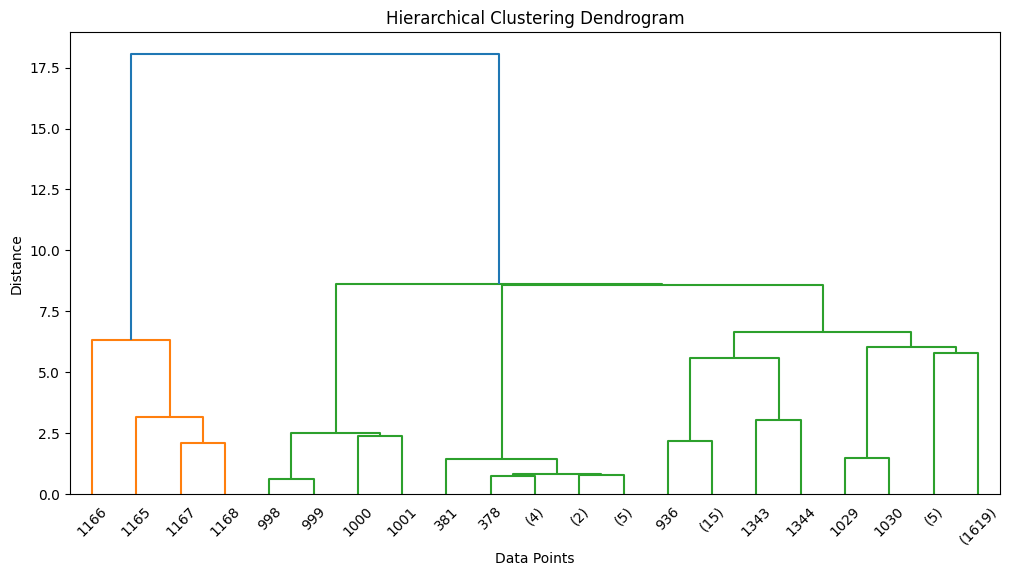

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


train = train.drop(columns=['ClientID'])


scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

#Hierarchical Clustering 

# for method in ['ward', 'average', 'complete', 'single']:
#     linkage_matrix = linkage(train_scaled, method=method)
#     labels = fcluster(linkage_matrix, 4, criterion='maxclust')
#     score = silhouette_score(train_scaled, labels)
#     print(f"Silhouette Score ({method} linkage): {score:.4f}")
# #Compute linkage matrix using Single Linkage
linkage_matrix = linkage(train_scaled, method='single')

# Assign clusters using hierarchical clustering
k = 3  # Chosen based on feasibility
labels_hierarchical = fcluster(linkage_matrix, k, criterion='maxclust')
train['Cluster_Hierarchical'] = labels_hierarchical


plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

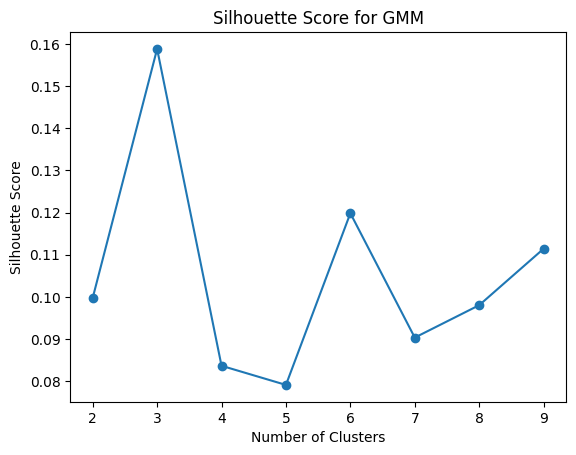

In [9]:

from sklearn.metrics import silhouette_score

silhouette_scores = []
for n in range(2, 10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(train_scaled)
    silhouette_scores.append(silhouette_score(train_scaled, labels))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for GMM")
plt.show()

In [10]:

from sklearn.decomposition import PCA  

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2 
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(train_scaled)
train['Cluster_GMM'] = gmm_labels


pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)

train.to_csv('clustered_data.csv', index=False)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

train.head()

,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,TotalDaysofFertility,LengthofMenses,MeanMensesLength,MeanBleedingIntensity,UnusualBleeding,Age,Numberpreg,Livingkids,Miscarriages,Abortions,Breastfeeding,Method,Whychart,BMI,Medvitexplain_Available,Gynosurgeries_Available,Prevmethod_Available,Cluster_Hierarchical,Cluster_GMM
0,0,29,27.33,17.0,12.0,9.0,4.0,4.49,9.04,0,36.0,3,3,0,0,0,9,2,21.254724,0,0,0,3,2
1,0,27,27.33,15.0,12.0,6.0,4.0,4.49,9.04,0,36.0,3,3,0,0,0,9,2,21.254724,0,0,0,3,2
2,0,29,27.33,15.0,14.0,5.0,4.0,4.49,9.04,0,36.0,3,3,0,0,0,9,2,21.254724,0,0,0,3,2
3,0,27,27.33,15.0,12.0,6.0,4.0,4.49,9.04,0,36.0,3,3,0,0,0,9,2,21.254724,0,0,0,3,2
4,0,28,27.33,16.0,12.0,8.0,4.0,4.49,9.04,0,36.0,3,3,0,0,0,9,2,21.254724,0,0,0,3,2


In [12]:
cluster_summary = train.groupby('Cluster_GMM').mean()
cluster_summary

,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,TotalDaysofFertility,LengthofMenses,MeanMensesLength,MeanBleedingIntensity,UnusualBleeding,Age,Numberpreg,Livingkids,Miscarriages,Abortions,Breastfeeding,Method,Whychart,BMI,Medvitexplain_Available,Gynosurgeries_Available,Prevmethod_Available,Cluster_Hierarchical
Cluster_GMM,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,27.564706,27.709529,14.423529,13.129412,7.560784,4.537255,4.529882,8.516706,0.000000,35.976471,4.854902,3.717647,1.121569,0.152941,1.090196,6.768627,2.686275,25.795204,0.423529,0.478431,0.235294,2.984314
1,0.601307,33.254902,32.358366,18.516340,13.575163,9.424837,6.196078,5.962157,11.419608,0.000000,30.849673,2.653595,2.254902,0.575163,0.000000,0.418301,7.954248,2.823529,25.260446,0.666667,0.169935,0.189542,2.947712
2,0.000000,29.169451,29.018592,15.849642,13.229912,7.885442,5.226730,5.214837,9.559554,0.063644,31.239459,1.906126,1.737470,0.168656,0.000000,0.000000,8.610183,2.991249,24.821076,0.607001,0.133652,0.118536,3.000000


In [13]:
cluster_summary = train.groupby('Cluster_Hierarchical').mean()
cluster_summary

,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,TotalDaysofFertility,LengthofMenses,MeanMensesLength,MeanBleedingIntensity,UnusualBleeding,Age,Numberpreg,Livingkids,Miscarriages,Abortions,Breastfeeding,Method,Whychart,BMI,Medvitexplain_Available,Gynosurgeries_Available,Prevmethod_Available,Cluster_GMM
Cluster_Hierarchical,,,,,,,,,,,,,,,,,,,,,,,
1,9.000000,32.250000,32.250000,15.500000,16.750000,6.250000,15.000000,8.250000,9.620000,0.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,25.102162,1.000000,0.000000,1.000000,1.000000
2,0.000000,27.750000,27.750000,14.000000,13.750000,12.750000,3.000000,3.500000,6.500000,0.00000,40.000000,0.000000,0.000000,0.000000,2.000000,4.000000,9.000000,6.000000,25.744629,1.000000,0.000000,0.000000,0.000000
3,0.033796,29.295715,29.120779,15.881714,13.236572,7.969825,5.191913,5.175244,9.578057,0.04828,31.926373,2.438141,2.098371,0.353651,0.018709,0.196741,8.286059,2.921545,25.008649,0.582378,0.190706,0.141219,1.607121


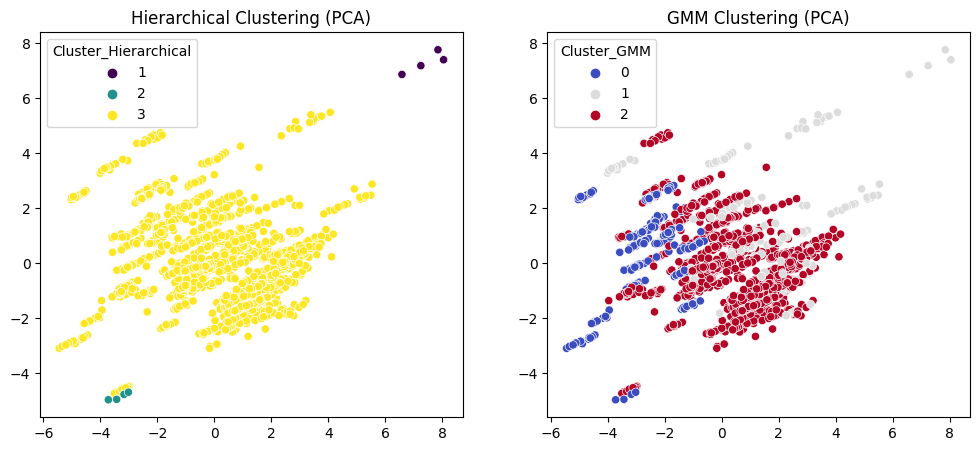

In [14]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train['Cluster_Hierarchical'], palette='viridis')
plt.title("Hierarchical Clustering (PCA)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train['Cluster_GMM'], palette='coolwarm')
plt.title("GMM Clustering (PCA)")

plt.show()


In [15]:
import pandas as pd
import numpy as np


df = pd.read_csv('clustered_data.csv')


def assign_cluster_label(row):
    # Cluster 1: Regular Cycle with High Fertility
    if (21 <= row['LengthofCycle'] <= 35 and  # Regular cycle length
        row['EstimatedDayofOvulation'] is not None and  # Ovulation data available
        row['TotalDaysofFertility'] >= 5):  # High fertility window
        return "Regular Cycle with High Fertility"

    # Cluster 2: Irregular Cycles with Anovulation
    elif (row['LengthofCycle'] < 21 or row['LengthofCycle'] > 35 and  # Irregular cycle length
          pd.isna(row['EstimatedDayofOvulation'])):  # Missing ovulation data
        return "Irregular Cycles with Anovulation"

    # Cluster 3: Postpartum or Breastfeeding
    elif (row['LengthofCycle'] > 40 and  # Long cycle length
          pd.isna(row['EstimatedDayofOvulation']) and  # Missing ovulation data
          row['TotalDaysofFertility'] == 0):  # No fertile days #can be added recent child birth but no data availabel
        return "Postpartum or Breastfeeding"

    # Cluster 4: Menstrual Disorders (PCOS, Endometriosis)
    elif (row['LengthofCycle'] > 35 and  # Short cycle length
          row['EstimatedDayofOvulation'] is not None and  # Ovulation data available
          row['MeanBleedingIntensity'] > 7):  # High bleeding intensity
        return "Menstrual Disorders (PCOS, Endometriosis)"

    # Cluster 5: Perimenopausal or Menopausal
    elif (row['LengthofCycle'] > 45 and  # Very long cycle length
          pd.isna(row['EstimatedDayofOvulation']) and  # Missing ovulation data
          row['TotalDaysofFertility'] == 0 and  # No fertile days
          row['Age'] > 45):  # Older age or  sometimes it's not menopause but some underlying health conidition
        return "Perimenopausal or Menopausal"

    # Default: Other Category (if none of the above conditions are met)
    else:
        return "Other Category"



df["Cluster_Label"] = df.apply(assign_cluster_label, axis=1)


df.to_csv("clustered_data_with_labels.csv", index=False)

(df[['Cluster_GMM', 'LengthofCycle', 'EstimatedDayofOvulation', 'TotalDaysofFertility', 'MeanBleedingIntensity', 'Age', 'Cluster_Label']]).head()


,Cluster_GMM,LengthofCycle,EstimatedDayofOvulation,TotalDaysofFertility,MeanBleedingIntensity,Age,Cluster_Label
0,2,29,17.0,9.0,9.04,36.0,Regular Cycle with High Fertility
1,2,27,15.0,6.0,9.04,36.0,Regular Cycle with High Fertility
2,2,29,15.0,5.0,9.04,36.0,Regular Cycle with High Fertility
3,2,27,15.0,6.0,9.04,36.0,Regular Cycle with High Fertility
4,2,28,16.0,8.0,9.04,36.0,Regular Cycle with High Fertility


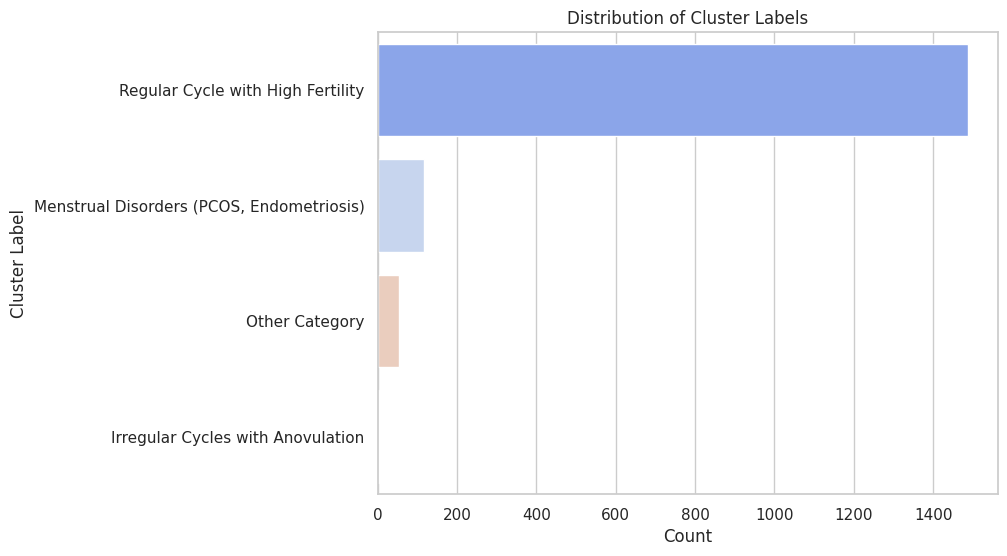

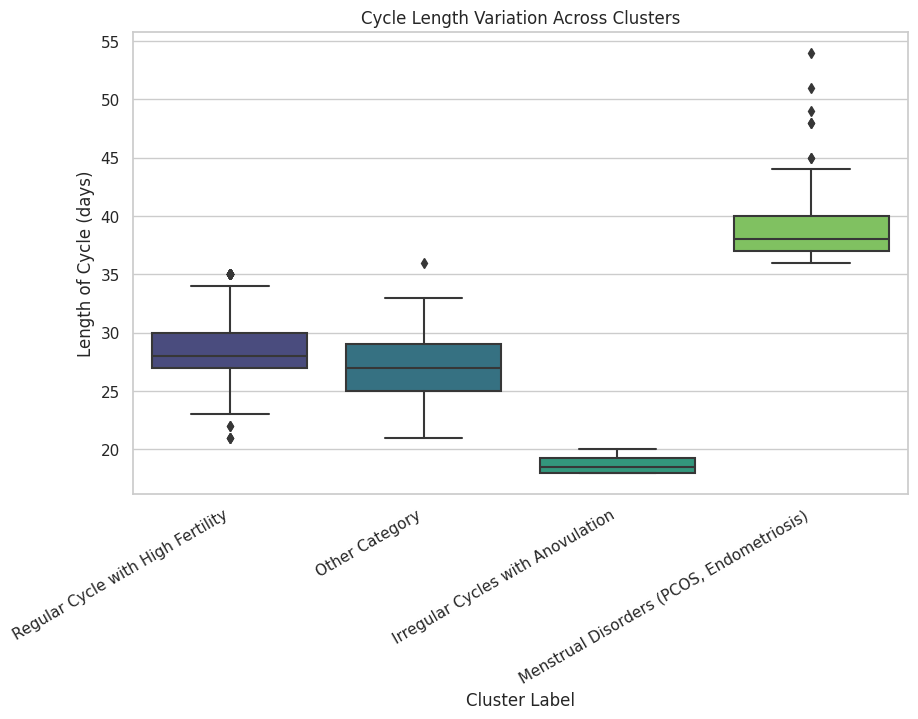

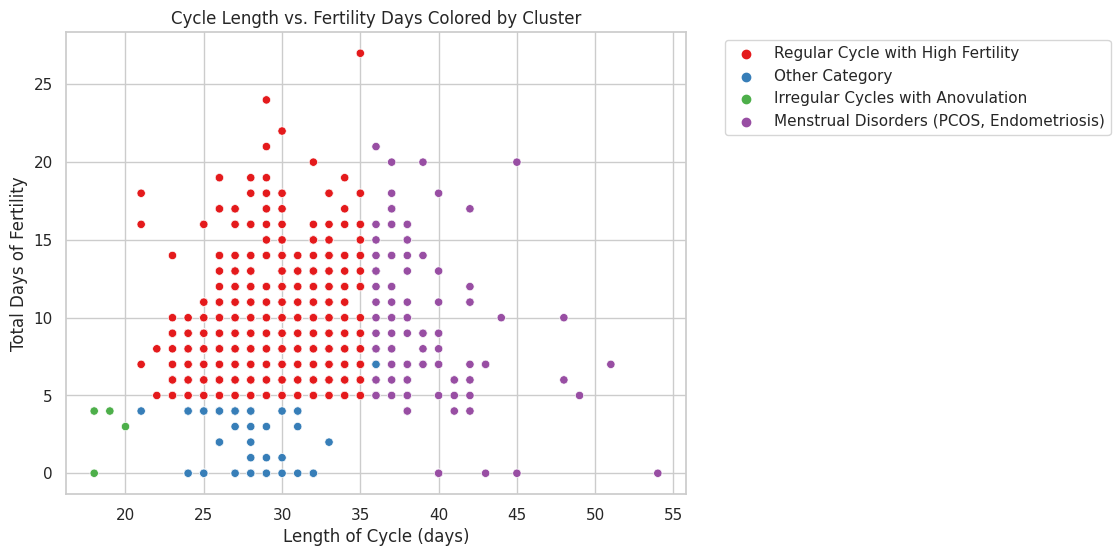

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("clustered_data_with_labels.csv")


sns.set(style="whitegrid")

# 1. Bar Plot - Distribution of Cluster Labels
plt.figure(figsize=(8, 6))
sns.countplot(y=df["Cluster_Label"], order=df["Cluster_Label"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Cluster Label")
plt.title("Distribution of Cluster Labels")
plt.show()

# 2. Box Plot - Cycle Length Across Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster_Label", y="LengthofCycle", data=df, palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.xlabel("Cluster Label")
plt.ylabel("Length of Cycle (days)")
plt.title("Cycle Length Variation Across Clusters")
plt.show()

# 3. Scatter Plot - Cycle Length vs. Fertility Days, Colored by Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x="LengthofCycle", y="TotalDaysofFertility", hue="Cluster_Label", data=df, palette="Set1")
plt.xlabel("Length of Cycle (days)")
plt.ylabel("Total Days of Fertility")
plt.title("Cycle Length vs. Fertility Days Colored by Cluster")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [17]:

train['Cluster_Label'] = train.apply(assign_cluster_label, axis=1)
print(train['Cluster_Label'].value_counts())


Cluster_Label
Regular Cycle with High Fertility            1488
Menstrual Disorders (PCOS, Endometriosis)     118
Other Category                                 55
Irregular Cycles with Anovulation               4
Name: count, dtype: int64


In [18]:
# Define insights for each cluster
insights = {
    "Regular Cycle with High Fertility": (
        "Tips for optimizing conception, nutritional advice for fertility, stress management techniques. "
        "Focus on maintaining a healthy lifestyle, tracking ovulation, and ensuring adequate intake of vitamins and minerals like folic acid and iron."
    ),
    "Irregular Cycles with Anovulation": (
        "Recommendations for tracking ovulation, advice on consulting a healthcare provider, lifestyle changes to regulate cycles. "
        "Consider exploring hormonal imbalances, managing stress, and maintaining a healthy weight to improve cycle regularity."
    ),
    "Postpartum or Breastfeeding": (
        "Information on postpartum fertility, guidance on contraception during breastfeeding, nutritional support for postpartum recovery. "
        "Focus on adequate rest, hydration, and a balanced diet to support recovery and lactation."
    ),
    "Menstrual Disorders (PCOS, Endometriosis)": (
        "Suggestions for managing symptoms, when to seek medical intervention, emotional and mental health support. "
        "Consider dietary changes, pain management strategies, and regular check-ups with a healthcare provider to manage conditions like PCOS or endometriosis."
    ),
    "Perimenopausal or Menopausal": (
        "Hormonal health advice, managing menopausal symptoms, bone health and cardiovascular care. "
        "Focus on maintaining bone density through calcium and vitamin D, managing hot flashes, and staying active to support overall health."
    ),
    "Other Category": (
        "General advice on menstrual health, tracking cycles, and maintaining a healthy lifestyle. "
        "Consider consulting a healthcare provider for personalized recommendations based on individual health history."
    )
}


train['Insights'] = train['Cluster_Label'].map(insights)


(train[['Cluster_Label', 'Insights']]).head()

,Cluster_Label,Insights
0,Regular Cycle with High Fertility,"Tips for optimizing conception, nutritional ad..."
1,Regular Cycle with High Fertility,"Tips for optimizing conception, nutritional ad..."
2,Regular Cycle with High Fertility,"Tips for optimizing conception, nutritional ad..."
3,Regular Cycle with High Fertility,"Tips for optimizing conception, nutritional ad..."
4,Regular Cycle with High Fertility,"Tips for optimizing conception, nutritional ad..."
